# **PHÂN TÍCH DỮ LIỆU**
---

Nhiệm vụ phần này: Đặt các câu hỏi có ý nghĩa, giải thích tại sao cần trả lời câu hỏi này và phân tích để trả lời câu hỏi.

Import các thư viện cần thiết

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/movie_data.csv')
df.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12215.766268,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


## CÂU 1: Với từng thể loại khác nhau thì đánh giá của khán giá khác nhau như thế nào ? Liệu số lượng bình chọn có ảnh hưởng tới đánh giá của từng thể loại hay không?

### 1. Lợi ích của việc trả lời câu hỏi

Trả lời câu hỏi này giúp chúng ta tìm hiểu đánh giá của khán giả với từng thể loại phim khác nhau, từ đó phần nào diễn giáỉ sở thích, khẩu vị xem phim của họ. 

### 2. Mô tả thuật toán

- Để trả lời câu hỏi này nhóm sử dụng dữ liệu của cột IMDb Ratings, IMDb Votes và các cột thể loại phim để điểm trung bình cho từng thể loại và kết hợp so sánh với số lượng phim của từng thể loại để đưa ra kết luận, giả định rằng từng thể loại có đóng góp như nhau vào kết quả rating/votes của 1 bộ phim.

- Điểm trung bình sẽ được tính bằng Bayasian Average, có công thức như sau: 

    $$
    \text{Bayesian Average} = \frac{\sum_{i=1}^n r_i + m \cdot C}{n + m}
    $$

    Trong đó:
    
    - $r_i$ là rating mỗi phim,
    - $n$ là số lượng vote,
    - $m$ là trung bình tất cả đánh giá,
    - $C$ là trung bình tất cả vote.

### 3. Code

In [3]:
data = df.copy()

genre_columns = ['Action', 
                 'Adventure', 
                 'Animation',
                 'Biography', 
                 'Comedy', 
                 'Crime', 
                 'Documentary', 
                 'Drama', 
                 'Family',
                 'Fantasy', 
                 'History', 
                 'Horror', 
                 'Music', 
                 'Musical',
                 'Mystery', 
                 'Romance', 
                 'Sci-Fi', 
                 'Short', 
                 'Sport',
                 'Thriller', 
                 'War', 
                 'Western']

In [4]:
C = data['IMDb Votes'].mean()
m = data['IMDb Rating'].mean()

genre_avg_rating = []

for genre in genre_columns:
    filtered_movies = data[data[genre] == 1]
    total_votes = filtered_movies['IMDb Votes'].sum()
    total_movie = filtered_movies['IMDb Rating'].count()

    # Bayesian Average
    bayesian_avg = (C * m + (filtered_movies['IMDb Rating'] * filtered_movies['IMDb Votes']).sum()) / (C + total_votes)
    genre_avg_rating.append((genre, total_movie, bayesian_avg))

avg_rating_df = pd.DataFrame(genre_avg_rating, columns = ['Genre', 'Total Movie', 'Average Rating'])

In [5]:
genre_most_movie = avg_rating_df.sort_values(by='Total Movie', ascending=True)
avg_rating_df.sort_values(by='Average Rating', ascending=True, inplace=True)

### 4. Trực quan

#### a) Số lượng phim của từng thể loại

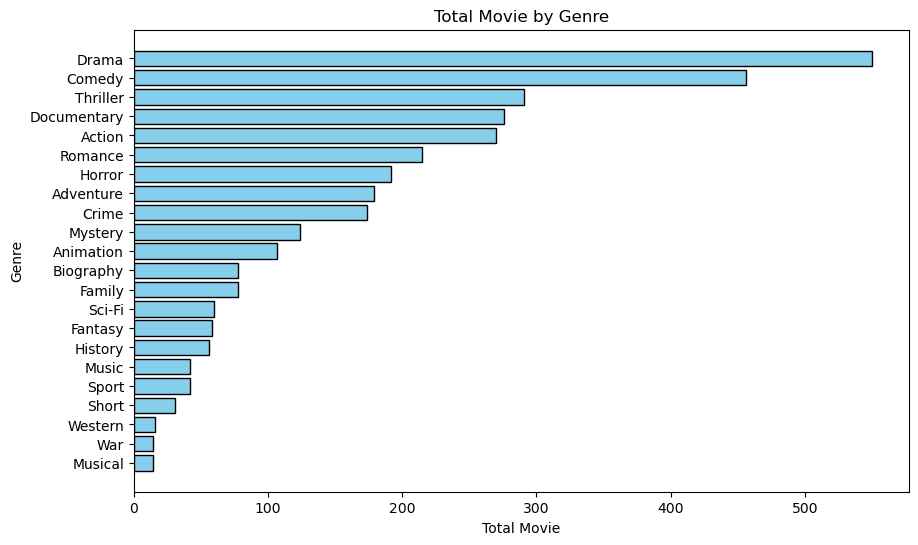

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(genre_most_movie['Genre'], genre_most_movie['Total Movie'], color='skyblue', edgecolor='black')
plt.xlabel('Total Movie')
plt.ylabel('Genre')
plt.title('Total Movie by Genre')
plt.show()

Nhận xét:

+ Số lượng phim có chênh lệch khá lớn với nhiều thể loại có số lượng phim rất nhiều, hơn 400 bộ phim và nhiều thể loại lại có số lượng phim rất ít, nhỏ hơn 50 bộ phim. 
+ Thể loại phim có nhiều bộ phim nhất là Drama với hơn 500 bộ phim thuộc thể loại này, tiếp theo là Comedy cũng có số lượng phim rất cao. Hai thể loại gần như áp đảo các thể loại phim khác.
+ Thể loại phim có ít bộ phim nhất là Musical, War và Western với ít hơn 50 bộ phim thuộc thể loại này. 

Một số thông tin tham khảo có thể giải thích cho điều này:

- Thể loại kịch (Comedy, Drama): Kịch có thể đề cập đến rất nhiều chủ đề và vấn đề xã hội khác nhau, từ gia đình, tình yêu, mâu thuẫn cá nhân đến các vấn đề chính trị và xã hội. Nhờ đó, kịch dễ dàng kết nối với cảm xúc và trải nghiệm của khán giả. Ngoài ra, kịch có thể phục vụ cho nhiều độ tuổi và khẩu vị khác nhau bằng khả năng kết hợp tốt các thể loại khác. Các câu chuyện mang yếu tố này rất đa dạng và phù hợp với nhiều bối cảnh văn hóa khác nhau.

=> Vì lý do đó, yếu tố kịch được các nhà làm phim chú trọng sản xuất nhiều nhất.

- Thể loại War, Sport: Phim chiến tranh thường tập trung vào các tình huống cụ thể xoay quanh xung đột vũ trang. Số lượng các cuộc chiến tranh lớn có thể khai thác là có hạn. Tương tự, những bộ phim về thể thao thường tập trung vào các sự kiện nhất định và có thể bị hạn chế về khía cạnh nội dung nếu không có một câu chuyện mạnh mẽ.

- Thể loại Music và Musical: Khó đáp ứng được thị hiếu của nhiều người vì không phải ai cũng thích nhạc và có khả năng cảm nhạc, do đó thị trường cho thể loại phim này thường bị hạn chế rất nhiều. 

=> Những lý do đó là thách thức của các nhà sản xuất theo đuổi lợi nhuận, cũng khó cho những người không có chuyên môn, vì vậy những thể loại này không phải là ưu tiên hàng đầu cho việc sản xuất.


#### b) Điểm trung bình mỗi thể loại

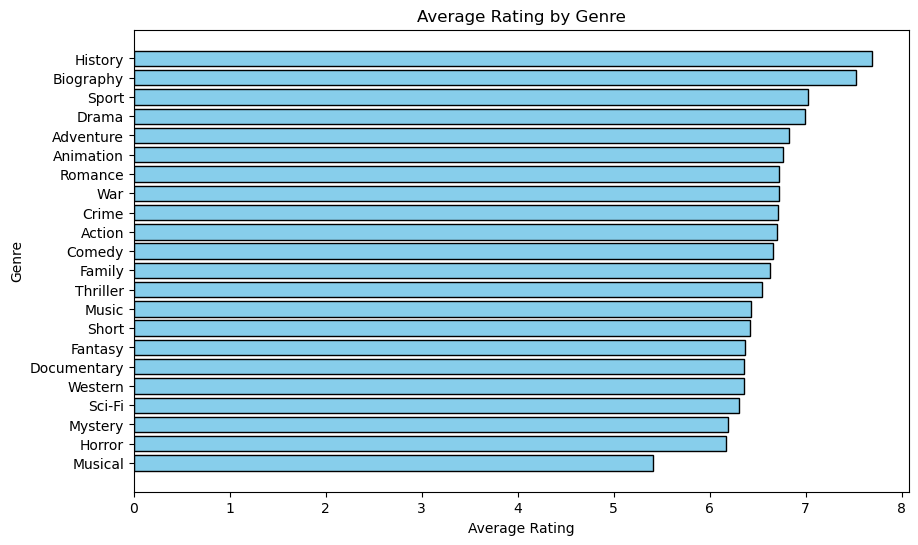

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(avg_rating_df['Genre'], avg_rating_df['Average Rating'], color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.show()

Nhận xét:

+ Phổ điểm có sự chênh lệch nhưng không quá lớn, trải đều từ ~5.5 tới ~8 điểm.
+ Các thể loại phim có xếp hạng trung bình cao nhất là History và Biography với mức điểm trên 7 điểm. 
+ Thể loại có điểm thấp nhất là Musical, với điểm số ~5.5 điểm. 

### 5. Insight

Từ 2 trực quan trên, ta có thể rút ra được thông tin sau: 

+ Số lượng và chất lượng không tương quan mạnh mẽ: Mặc dù Drama là thể loại có số lượng phim lớn nhất, nhưng xếp hạng trung bình của nó chỉ ở mức khá (xếp thứ 4 trong biểu đồ bên trái). Ngược lại, các thể loại như History, Biography, và Sport tuy có số lượng phim thấp hơn nhưng lại có xếp hạng trung bình rất cao. Điều này cho thấy số lượng phim lớn không đảm bảo chất lượng của thể loại đó là tốt hay được ưa thích một cách tuyệt đối.

+ Các thể loại ít nhưng chất lượng: Các thể loại như History, Biography và Sport thường hướng đến đối tượng khán giả cụ thể, nhưng nội dung có chiều sâu và ý nghĩa. Đây là các thể loại mà nhà sản xuất có thể tập trung đầu tư để tạo ra những bộ phim chất lượng, vì khán giả có xu hướng đánh giá cao.

+ Các thể loại phổ biến nhưng chất lượng không quá tốt: Các yếu tố như Drama, Comedy, Documentary có xuất hiện trong rất nhiều bộ phim, nhưng đánh giá của thể loại này lại chỉ ở mức khá hoặc trung bình. Điều này có thể do các nhà làm phim không thể đáp ứng đủ yêu cầu của số lượng người xem quá lớn, có phần dễ dãi trong sản xuất, kịch bản khiến nhiều bộ phim có đánh giá thấp. 

+ Các thể loại không được đánh giá cao: Thể loại Sci-Fi, Horror và Musical vừa có xếp hạng trung bình thấp, vừa có số lượng phim ít. Điều này có thể phản ánh rằng các thể loại này chưa đáp ứng được kỳ vọng của khán giả, cũng như chưa được khai thác đúng cách.


## Câu 2: Các phim thuộc thể loại nào có nhiều khả năng được đề cử hoặc giành giải thưởng nhất?

### 1. Lợi ích của việc trả lời câu hỏi

- Giúp các nhà làm phim định hướng chọn thể loại để tăng khả năng được đề cử và giành giải thưởng.
- Tối ưu hoá chiến lược phát triển nội dung dựa trên xu hướng thành công.
- Các nhà đầu tư có thể định hướng tài trợ vào các dự án có khả năng được đánh giá cao.
- Hiểu rõ xu hướng thị hiếu và tiêu chí đánh giá từ các hội đồng giải thưởng.

### 2. Mô tả thuật toán 

- Phân tích mối tương quan giữa thể loại phim và số lần được đề cử hoặc giành giải (dựa vào cột "Win" và "Nomination").
- Tính tổng số lần đề cử và giải thưởng của từng thể loại.
- Xác định thể loại nổi bật bằng cách sắp xếp theo số liệu tổng hợp.
- Vẽ biểu đồ thanh (bar chart) để thể hiện tổng số đề cử và giải thưởng của từng thể loại.
- Sử dụng biểu đồ tròn (pie chart) để phân tích tỉ lệ đóng góp của các thể loại hàng đầu.

### 3. Code

In [8]:
# genre_columns = [
#     "Action/Adventure", "Animation", "Biography/History/War", "Comedy",
#     "Docummentary", "Drama", "Fantasy/Sci-Fi", "Horror/Thriller/Mystery",
#     "Kids/Family", "Music/Musical", "Other", "Romance"
# ]
movie_data = df.copy()

# Tính tổng số đề cử và thắng giải của từng thể loại
genre_awards = {
    genre: {
        "Nominations": movie_data.loc[movie_data[genre] == True, "Nomination"].sum(),
        "Wins": movie_data.loc[movie_data[genre] == True, "Win"].sum()
    }
    for genre in genre_columns
}

genre_awards_df = pd.DataFrame(genre_awards).T
genre_awards_df['Total'] = genre_awards_df['Nominations'] + genre_awards_df['Wins']

# Sắp xếp theo tổng số lần đề cử và thắng giải
genre_awards_df = genre_awards_df.sort_values(by="Total", ascending=False)

### 4. Trực quan

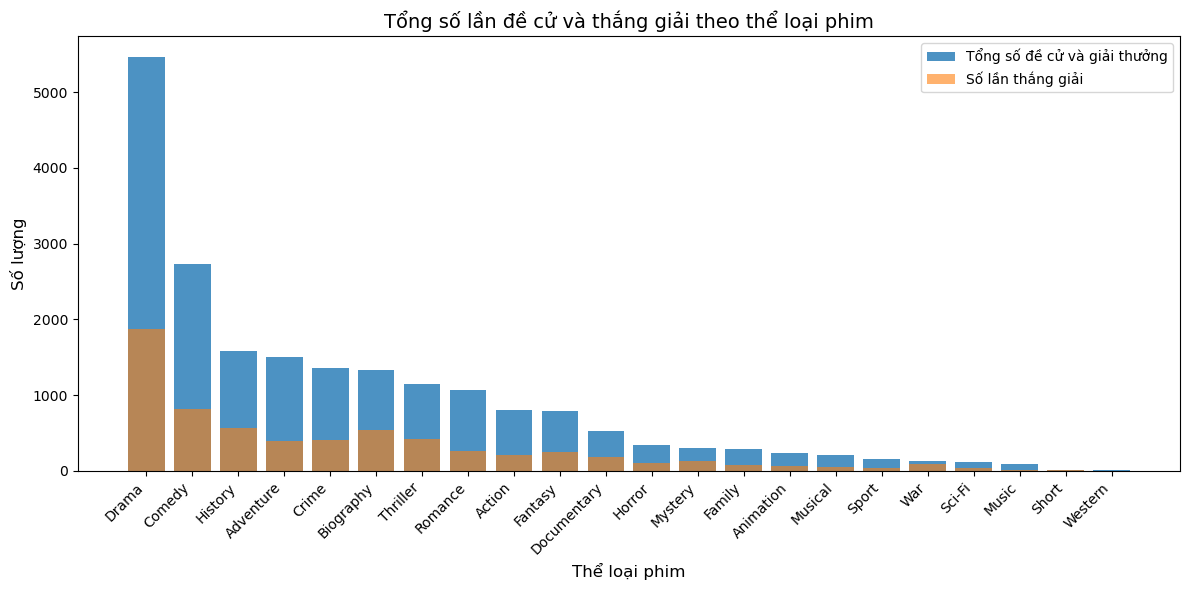

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(genre_awards_df.index, genre_awards_df['Total'], alpha=0.8, label='Tổng số đề cử và giải thưởng')
plt.bar(genre_awards_df.index, genre_awards_df['Wins'], alpha=0.6, label='Số lần thắng giải')

plt.title('Tổng số lần đề cử và thắng giải theo thể loại phim', fontsize=14)
plt.xlabel('Thể loại phim', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 5. Insight

Nhận xét: 

1. Thể loại nổi bật:
- Các thể loại như Drama, Comedy và History có số lần đề cử và thắng giải cao nhất.
- Drama vượt trội rõ ràng với tổng số lần được đề cử và thắng giải lớn nhất.

2. Thể loại kém nổi bật:
- Thể loại như Western, Short, Music, Sci-Fi có số lượng thấp hơn, ít cơ hội xuất hiện trong các đề cử hoặc thắng giải.

Kết luận chung:

1. Drama và Comedy là những "ứng cử viên" sáng giá:
- Các bộ phim thuộc thể loại Drama thường nhận được nhiều sự chú ý nhất từ các giải thưởng.
- Các thể loại có tính giáo dục và ý nghĩa lịch sử (Biography, History) cũng thường được đề cao.

2. Đề cử không đồng nghĩa với thắng giải:
- Dù nhiều thể loại có số lượng đề cử lớn, không phải tất cả đều chuyển hóa thành chiến thắng.

3. Chiến lược sản xuất:
- Nếu mục tiêu là đạt giải thưởng, các nhà sản xuất nên tập trung vào Drama hoặc kết hợp nội dung với yếu tố lịch sử, tiểu sử.

4. Cần cân nhắc khán giả:
- Trong khi các thể loại như Music, Short,.. ít đạt giải, chúng vẫn có thể thành công thương mại vì đáp ứng nhu cầu giải trí.

## Câu 3: Nhóm tuổi (Age rating) ảnh hưởng thế nào đến sự phổ biến của các thể loại phim qua số lượt bình chọn IMDb?

Trả lời câu hỏi này: 
- Hiểu tác động của đối tượng khán giả mục tiêu đến mức độ phổ biến của phim.
- Giúp điều chỉnh nội dung phù hợp với đối tượng mục tiêu để tăng sức hút thị trường.

- Nhóm dữ liệu theo cột Age rating và tính trung bình số lượng IMDb Votes.
- So sánh mức độ phổ biến giữa các nhóm tuổi khác nhau.
- Có thể mở rộng để xem xét tương quan giữa Age rating và các yếu tố khác như IMDb Rating, thể loại.

## Câu 4: Thời lượng phim (Runtime) ảnh hưởng như thế nào đến số lượng IMDb Votes và IMDb Rating?

Thời lượng phim là một yếu tố khá quan trọng vì nó ảnh hưởng đến trải nghiệm của người xem. Thời lượng dài có thể giúp phim phát triển cốt truyện chi tiết hơn, nhưng cũng tiềm ẩn nhiều nguy cơ như có thể làm giảm hứng thú nếu không được xây dựng tốt và tốn kém nhân lực và nguồn lực vì cần đầu tư nhiều hơn.

Trả lời câu hỏi này giúp chúng ta xác định thời lượng lý tưởng của một bộ phim để thu hút khán giả và đạt được điểm đánh giá cao.


Để trả lời câu hỏi này ta sẽ sử dụng 3 cột là **Runtime, IDMb Votes** và **IMDb Rating**
- Phân tích phân phối thời lượng phim.
- Xem sự tương quan giữa **Runtime** và 2 đặc trưng còn lại.
- Kiểm tra sự ảnh hưởng của thời lượng đến số lượt bình chọn và đánh giá. Liệu phim có thời lượng thế nào có xu hướng đạt được nhiều bình chọn hoặc đánh giá hơn không? 

## Câu 5: Thể loại nào có xu hướng phát triển mạnh nhất trong thời gian qua dựa trên số lượng phim phát hành?

Khi theo dõi xu hướng thị trường thì số lượng phim phát hành qua các năm sẽ phản ảnh được sự phát triển của từng thể loại trong ngành điện ảnh. Từ đó, giúp ta dự đoán thể loại nào sẽ tiếp tục phát triển, có khả năng phát triển hay sẽ trở nên lỗi thời. 

Trả lời câu hỏi này giúp dự đoán xu hướng phát triển của ngành công nghiệp điện ảnh để định hướng đầu tư vào các thể loại tiềm năng trong tương lai.

Để trả lời câu hỏi này ta cần 2 cột là **Release time** và 13 cột thể loại
- Tính tổng số lượng phim phát hành mỗi năm theo từng thể loại.
- Trực quan hóa xu hướng của mỗi thể loại qua các năm để so sánh sự thay đổi về số lượng phim phát hành của từng thể loại.
- Phân tích sự tăng trưởng hay suy giảm của từng thể loại để xác định thể loại nào tăng trưởng nhanh hay đang xuống dốc
- Uớc tính số lượng phim phát hành của từng thể loại trong các năm tiếp theo.